In [91]:
# this notebook is used to create the visualizations. intended to make the visualization creation process transparent

In [92]:
import pandas as pd
from ipycanvas import Canvas, hold_canvas
import numpy as np
from pathlib import Path
from Player import Player
from Route import Route
import Metric
import Model
import os
from FindGameFiles import FindGameFiles
import PermHelpers
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
# goes through the files and accumulates relevant plays
Route.find_all_relevant([Metric.statcast_jump])

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:84: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_id").filter(Route.is_relevant())


True

In [94]:
all_routes_df = Route.get_all_routes_df()

In [95]:
# adds hang time to table
with_hang_time = all_routes_df.copy(deep = True)
with_hang_time["hang_time"] = with_hang_time["route_obj"].apply(lambda x: x.get_hang_time())

# adds whether or not each play was caught
with_caught = with_hang_time.copy(deep = True)
with_caught["was_caught"] = with_caught["route_obj"].apply(lambda x: x.get_was_caught())

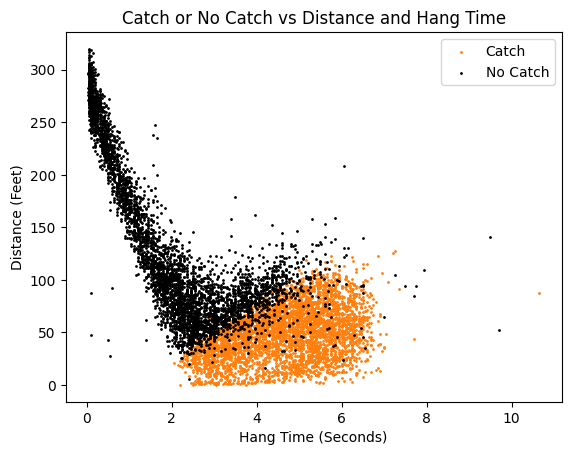

In [200]:
fig, ax = plt.subplots()
for color in ["tab:orange", "black"]:
    if color == "tab:orange":
        df = with_caught[with_caught["was_caught"]]
        ax.scatter(df["hang_time"] / 1000, df["bounce_dist"], c=color, s=1, label="Catch")
    else:
        df = with_caught[-with_caught["was_caught"]]
        ax.scatter(df["hang_time"] / 1000, df["bounce_dist"], c=color, s=1, label="No Catch")

ax.legend()
ax.set_xlabel("Hang Time (Seconds)")
ax.set_ylabel("Distance (Feet)")
ax.set_title("Catch or No Catch vs Distance and Hang Time")

plt.show()

In [97]:
subroutes = Route.get_all_subroutes_df()

c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  rdf["quarter_sec_velo"].iloc[-1] = rdf["distance_remaining"].iloc[-2] * 4
c:\Users\Owner\Desktop\coding stuff\smt data challen

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  rdf["quarter_sec_velo"].iloc[-1] = rdf["distance_remaining"].iloc[-2] * 4
c:\Users\Owner\Desktop\coding stuff\smt data challen

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  rdf["quarter_sec_velo"].iloc[-1] = rdf["distance_remaining"].iloc[-2] * 4
c:\Users\Owner\Desktop\coding stuff\smt data challen

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


In [100]:
cont_mod = Model.create_cont_model(subroutes)

In [110]:
with_pred = pd.concat([subroutes.reset_index(), pd.DataFrame(cont_mod.predict_proba(subroutes))], axis = 1)

In [111]:
with_pred["pred"] = np.round(with_pred[1] * 20) / 20
with_pred = with_pred.drop(columns = ["index"])

In [118]:
with_pred["unique_id"] = with_pred["route_obj"] == with_pred["route_obj"].shift(1)
with_pred["unique_id"] = with_pred["unique_id"].apply(lambda x: np.nan if x else 1)
with_pred["unique_id"] = (with_pred["unique_id"] * range(with_pred.shape[0])).ffill()

In [132]:
with_pred["new"] = with_pred["unique_id"] != with_pred["unique_id"].shift(1)

In [168]:
with_pred.groupby("unique_id").filter(lambda x: x["pred"].iloc[0] < .60 and x["pred"].iloc[0] > .40 and x["quarter_sec_velo"].iloc[1] < 0 and x["was_caught"].iloc[0])

,route_obj,distance_remaining,hang_time_remaining,updated_direction,quarter_sec_velo,was_caught,0,1,pred,unique_id,new
120131,<Route.Route object at 0x000001A3A24B8340>,99.210284,5250,back,0.000000,True,0.468292,0.531708,0.55,120131.0,True
120132,<Route.Route object at 0x000001A3A24B8340>,99.974244,5000,back,-3.058589,True,0.829698,0.170302,0.15,120131.0,False
120133,<Route.Route object at 0x000001A3A24B8340>,100.360641,4750,back,-1.551634,True,0.902891,0.097109,0.10,120131.0,False
120134,<Route.Route object at 0x000001A3A24B8340>,100.002487,4500,back,1.420002,True,0.894884,0.105116,0.10,120131.0,False
120135,<Route.Route object at 0x000001A3A24B8340>,98.465393,4250,back,6.129398,True,0.734550,0.265450,0.25,120131.0,False
120136,<Route.Route object at 0x000001A3A24B8340>,95.592382,4000,back,11.471854,True,0.546340,0.453660,0.45,120131.0,False
120137,<Route.Route object at 0x000001A3A24B8340>,91.525292,3750,back,16.252649,True,0.402355,0.597645,0.60,120131.0,False
120138,<Route.Route object at 0x000001A3A24B8340>,86.561507,3500,back,19.846087,True,0.297971,0.702029,0.70,120131.0,False
120139,<Route.Route object at 0x000001A3A24B8340>,81.012602,3250,back,22.192131,True,0.225268,0.774732,0.75,120131.0,False
120140,<Route.Route object at 0x000001A3A24B8340>,75.109539,3000,back,23.611800,True,0.194592,0.805408,0.80,120131.0,False


,route_obj,distance_remaining,hang_time_remaining,updated_direction,quarter_sec_velo,was_caught,0,1,pred,unique_id,new,orig_hang_time,time_elapsed
hang_time_remaining,,,,,,,,,,,,,
0.00,<Route.Route object at 0x000001A3A24B8340>,99.210284,5250,back,0.000000,True,0.468292,0.531708,0.55,120131.0,True,5250.0,0.0
0.25,<Route.Route object at 0x000001A3A24B8340>,99.974244,5000,back,-3.058589,True,0.829698,0.170302,0.15,120131.0,False,5250.0,250.0
0.50,<Route.Route object at 0x000001A3A24B8340>,100.360641,4750,back,-1.551634,True,0.902891,0.097109,0.10,120131.0,False,5250.0,500.0
0.75,<Route.Route object at 0x000001A3A24B8340>,100.002487,4500,back,1.420002,True,0.894884,0.105116,0.10,120131.0,False,5250.0,750.0
1.00,<Route.Route object at 0x000001A3A24B8340>,98.465393,4250,back,6.129398,True,0.734550,0.265450,0.25,120131.0,False,5250.0,1000.0
1.25,<Route.Route object at 0x000001A3A24B8340>,95.592382,4000,back,11.471854,True,0.546340,0.453660,0.45,120131.0,False,5250.0,1250.0
1.50,<Route.Route object at 0x000001A3A24B8340>,91.525292,3750,back,16.252649,True,0.402355,0.597645,0.60,120131.0,False,5250.0,1500.0
1.75,<Route.Route object at 0x000001A3A24B8340>,86.561507,3500,back,19.846087,True,0.297971,0.702029,0.70,120131.0,False,5250.0,1750.0
2.00,<Route.Route object at 0x000001A3A24B8340>,81.012602,3250,back,22.192131,True,0.225268,0.774732,0.75,120131.0,False,5250.0,2000.0


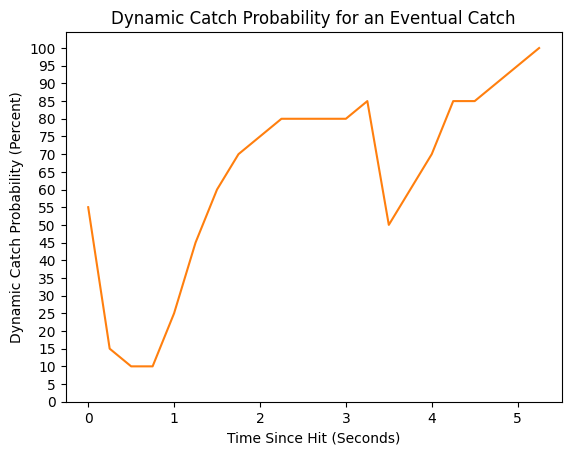

In [199]:
example_id1 = 120131
example_id2 = 123527
ex1df = with_pred[with_pred["unique_id"] == example_id1]
ex1df.index = (ex1df["hang_time_remaining"].iloc[0] - ex1df["hang_time_remaining"]) / 1000
fig, ax = plt.subplots()
ax.plot(ex1df["pred"] * 100, c = "tab:orange")
ax.set_xlabel("Time Since Hit (Seconds)")
ax.set_ylabel("Dynamic Catch Probability (Percent)")
ax.set_title("Dynamic Catch Probability for an Eventual Catch")
ax.set_yticks(np.arange(0, 101, 5))
ex1df

,route_obj,distance_remaining,hang_time_remaining,updated_direction,quarter_sec_velo,was_caught,0,1,pred,unique_id,new,orig_hang_time,time_elapsed
hang_time_remaining,,,,,,,,,,,,,
0.00,<Route.Route object at 0x000001A3A472B640>,47.949461,2750,right,0.000000,False,0.489028,5.109723e-01,0.50,123527.0,True,2750.0,0.0
0.25,<Route.Route object at 0x000001A3A472B640>,47.466420,2500,right,1.932087,False,0.545937,4.540632e-01,0.45,123527.0,False,2750.0,250.0
0.50,<Route.Route object at 0x000001A3A472B640>,46.683959,2250,right,3.129057,False,0.724767,2.752334e-01,0.30,123527.0,False,2750.0,500.0
0.75,<Route.Route object at 0x000001A3A472B640>,45.608567,2000,right,4.294992,False,0.897431,1.025693e-01,0.10,123527.0,False,2750.0,750.0
1.00,<Route.Route object at 0x000001A3A472B640>,43.047686,1750,right,10.096496,False,0.754007,2.459932e-01,0.25,123527.0,False,2750.0,1000.0
1.25,<Route.Route object at 0x000001A3A472B640>,40.249588,1500,right,10.946491,False,0.920209,7.979067e-02,0.10,123527.0,False,2750.0,1250.0
1.50,<Route.Route object at 0x000001A3A472B640>,37.970313,1250,right,8.500667,False,0.997227,2.772718e-03,0.00,123527.0,False,2750.0,1500.0
1.75,<Route.Route object at 0x000001A3A472B640>,36.369168,1000,right,5.345179,False,0.999995,5.245349e-06,0.00,123527.0,False,2750.0,1750.0
2.00,<Route.Route object at 0x000001A3A472B640>,35.373509,750,right,2.700343,False,1.000000,6.574351e-09,0.00,123527.0,False,2750.0,2000.0


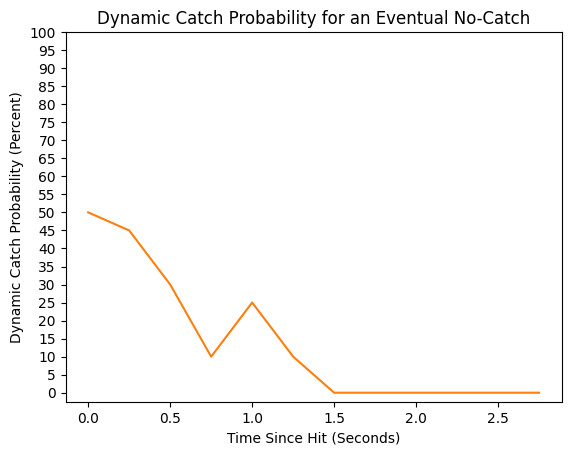

In [198]:
ex2df = with_pred[with_pred["unique_id"] == example_id2]
ex2df.index = (ex2df["hang_time_remaining"].iloc[0] - ex2df["hang_time_remaining"]) / 1000
fig, ax = plt.subplots()
ax.plot(ex2df["pred"] * 100, c = "tab:orange")
ax.set_xlabel("Time Since Hit (Seconds)")
ax.set_ylabel("Dynamic Catch Probability (Percent)")
ax.set_title("Dynamic Catch Probability for an Eventual No-Catch")
ax.set_yticks(np.arange(0, 101, 5))
ex2df

In [176]:
with_pred["orig_hang_time"] = with_pred["hang_time_remaining"] * with_pred["new"].apply(lambda x: 1 if x else np.nan)
with_pred["orig_hang_time"] = with_pred["orig_hang_time"].ffill()
with_pred["time_elapsed"] = with_pred["orig_hang_time"] - with_pred["hang_time_remaining"]

C:\Users\Owner\AppData\Local\Temp\ipykernel_19216\1270904818.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  with_pred[with_pred["orig_hang_time"] < 8000][["unique_id", "time_elapsed", "pred", "orig_hang_time"]].groupby("unique_id").apply(lambda x: ax.plot(x["time_elapsed"] / 1000, x["pred"] * 100, c = "black", alpha = 0.01))


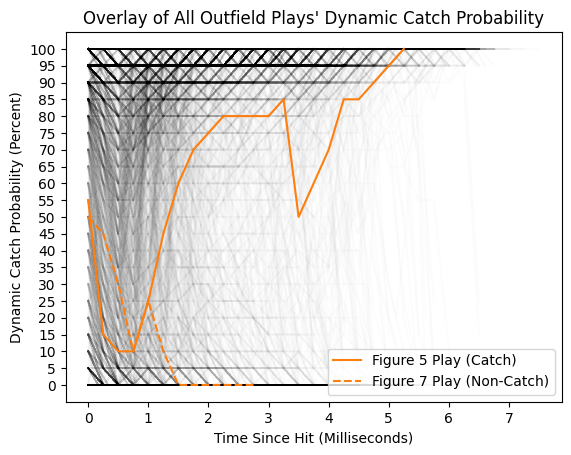

In [223]:
fig, ax = plt.subplots()
with_pred[with_pred["orig_hang_time"] < 8000][["unique_id", "time_elapsed", "pred", "orig_hang_time"]].groupby("unique_id").apply(lambda x: ax.plot(x["time_elapsed"] / 1000, x["pred"] * 100, c = "black", alpha = 0.01))
ax.plot(with_pred[with_pred["unique_id"] == example_id1]["time_elapsed"] / 1000, with_pred[with_pred["unique_id"] == example_id1]["pred"] * 100, color = "tab:orange", linestyle = "-", label = "Figure 5 Play (Catch)")
ax.plot(with_pred[with_pred["unique_id"] == example_id2]["time_elapsed"] / 1000, with_pred[with_pred["unique_id"] == example_id2]["pred"] * 100, color = "tab:orange", linestyle = "--", label = "Figure 7 Play (Non-Catch)")
ax.set_title("Overlay of All Outfield Plays' Dynamic Catch Probability")
ax.set_xlabel("Time Since Hit (Milliseconds)")
ax.set_yticks(np.arange(0, 101, 5))
ax.set_ylabel("Dynamic Catch Probability (Percent)")
ax.legend(loc = "lower right")

In [221]:
mlbjumps = pd.read_csv("jump.csv")
mlbspeeds = pd.read_csv("sprint_speed.csv")

In [226]:
jump_and_speed = mlbjumps.merge(mlbspeeds, on = "last_name, first_name")

In [235]:
jump_and_speed.sort_values("outs_above_average")

,"last_name, first_name",resp_fielder_id,year,outs_above_average,outs_per_play,rel_league_burst_distance,rel_league_reaction_distance,rel_league_routing_distance,rel_league_bootup_distance,f_bootup_distance,...,n_outs,player_id,team_id,team,position,age,competitive_runs,bolts,hp_to_1b,sprint_speed
56,"Marte, Starling",516782,2024,-9,30.0,-1.1,-0.7,0.4,-1.5,32.0,...,9,516782,121,NYM,RF,35,108,3.0,4.36,26.7
33,"García, Adolis",666969,2024,-7,30.0,-0.8,0.1,-0.2,-0.8,33.1,...,12,666969,140,TEX,RF,31,136,NaN,4.54,26.6
2,"Andujar, Miguel",609280,2024,-7,25.8,-1.8,1.5,-1.8,-2.1,32.0,...,8,609280,133,OAK,LF,29,117,NaN,4.64,26.4
3,"Arozarena, Randy",668227,2024,-7,34.0,-1.8,-0.5,0.2,-2.0,31.4,...,17,668227,136,SEA,LF,29,138,4.0,4.33,28.0
72,"Profar, Jurickson",595777,2024,-7,32.6,-1.9,0.1,-0.5,-2.4,30.4,...,14,595777,135,SD,LF,31,148,NaN,4.44,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,"Kiermaier, Kevin",595281,2024,8,77.3,2.2,0.8,0.5,3.5,38.4,...,34,595281,119,LAD,CF,34,86,NaN,4.29,28.6
87,"Siri, Jose",642350,2024,9,72.7,2.2,1.3,-0.3,3.2,38.2,...,40,642350,139,TB,CF,28,89,28.0,4.22,29.9
100,"Varsho, Daulton",662139,2024,10,67.2,2.1,1.6,0.1,3.8,37.8,...,45,662139,141,TOR,LF,27,94,NaN,4.26,28.4
86,"Siani, Michael",672279,2024,12,83.0,2.0,1.7,-0.6,3.1,37.4,...,39,672279,138,STL,CF,24,101,1.0,4.29,28.4


In [245]:
jump_and_speed.sort_values("rel_league_bootup_distance")

,"last_name, first_name",resp_fielder_id,year,outs_above_average,outs_per_play,rel_league_burst_distance,rel_league_reaction_distance,rel_league_routing_distance,rel_league_bootup_distance,f_bootup_distance,...,n_outs,player_id,team_id,team,position,age,competitive_runs,bolts,hp_to_1b,sprint_speed
103,"Winker, Jesse",608385,2024,-6,38.7,-2.3,-1.5,0.1,-3.7,30.0,...,12,608385,121,NYM,LF,30,130,NaN,4.63,26.1
47,"Judge, Aaron",592450,2024,-5,40.0,-2.3,-1.1,0.3,-3.1,31.1,...,16,592450,147,NYY,CF,32,116,NaN,4.78,26.8
31,"Freeman, Tyler",671289,2024,-4,41.4,-1.6,-1.5,0.3,-2.8,31.5,...,12,671289,114,CLE,CF,25,138,NaN,4.49,28.2
75,"Raley, Luke",670042,2024,-5,42.9,-2.1,-0.8,0.2,-2.8,30.4,...,12,670042,136,SEA,LF,29,100,2.0,4.31,29.0
15,"Castellanos, Nick",592206,2024,-5,38.9,-1.8,-0.9,-0.1,-2.7,30.2,...,14,592206,143,PHI,RF,32,136,NaN,4.50,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,"Crow-Armstrong, Pete",691718,2024,6,75.0,2.6,0.5,0.3,3.3,37.8,...,30,691718,112,CHC,CF,22,84,41.0,4.09,30.0
106,"Young, Jacob",696285,2024,14,76.2,1.7,4.5,-2.8,3.4,38.2,...,48,696285,120,WSH,CF,24,155,44.0,4.19,29.7
50,"Kiermaier, Kevin",595281,2024,8,77.3,2.2,0.8,0.5,3.5,38.4,...,34,595281,119,LAD,CF,34,86,NaN,4.29,28.6
63,"Meyers, Jake",676694,2024,8,75.6,2.1,1.0,0.3,3.5,38.2,...,31,676694,117,HOU,CF,28,112,1.0,4.36,28.8


Text(1.8, 2, 'Gurriel Jr.')

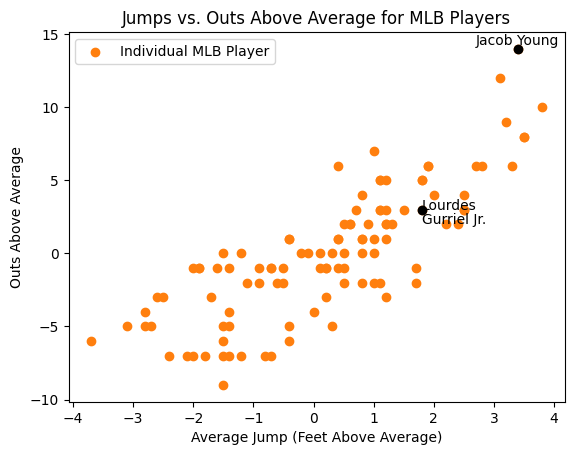

In [266]:
fig, ax = plt.subplots()
ax.scatter(jump_and_speed["rel_league_bootup_distance"], jump_and_speed["outs_above_average"], color = "tab:orange", label = "Individual MLB Player")
ax.set_title("Jumps vs. Outs Above Average for MLB Players")
ax.legend(loc = "upper left")
ax.set_xlabel("Average Jump (Feet Above Average)")
ax.set_ylabel("Outs Above Average")
ax.scatter(3.4, 14, color = "black")
ax.text(2.7, 14.3, "Jacob Young")
ax.scatter(1.8, 3, color = "black")
ax.text(1.8, 3, "Lourdes")
ax.text(1.8, 2, "Gurriel Jr.")

In [259]:
jump_and_speed[(jump_and_speed["sprint_speed"] < 26.85) & (jump_and_speed["outs_above_average"] > 2)]

,"last_name, first_name",resp_fielder_id,year,outs_above_average,outs_per_play,rel_league_burst_distance,rel_league_reaction_distance,rel_league_routing_distance,rel_league_bootup_distance,f_bootup_distance,...,n_outs,player_id,team_id,team,position,age,competitive_runs,bolts,hp_to_1b,sprint_speed
38,"Gurriel Jr., Lourdes",666971,2024,3,65.5,0.7,1.2,-0.1,1.8,35.6,...,36,666971,109,AZ,LF,30,147,NaN,4.6,26.8


Text(29.7, 12, 'Young')

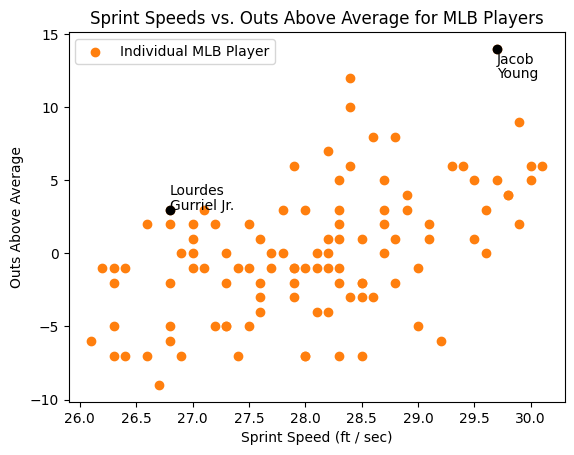

In [273]:
fig, ax = plt.subplots()
ax.scatter(jump_and_speed["sprint_speed"], jump_and_speed["outs_above_average"], color = "tab:orange", label = "Individual MLB Player")
ax.set_title("Sprint Speeds vs. Outs Above Average for MLB Players")
ax.legend(loc = "upper left")
ax.set_xlabel("Sprint Speed (ft / sec)")
ax.set_ylabel("Outs Above Average")
ax.scatter(26.8, 3, color = "black")
ax.text(26.8, 4, "Lourdes")
ax.text(26.8, 3, "Gurriel Jr.")
ax.scatter(29.7, 14, color = "black")
ax.text(29.7, 13, "Jacob")
ax.text(29.7, 12, "Young")